In [13]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.table import Table

In [12]:
angs = [35, 55, 65, 75, 85]
tab = dict()
for ang in angs:

    #Read the table. 
    tab[ang] = Table.read('blueHotDogsPol_gs0.005-0.25_a3.5_i{}_sed.dat'.format(ang), format='ascii')

    #Rename the columns
    header = ["wavelegnth", "flux", "Q", "U", "V"]
    for i, col in enumerate(tab[ang].colnames):
        tab[ang].rename_column(col, header[i])

    #Calculate the polarization fraction. 
    tab[ang]["P"] = -tab[ang]["Q"]/tab[ang]["flux"]

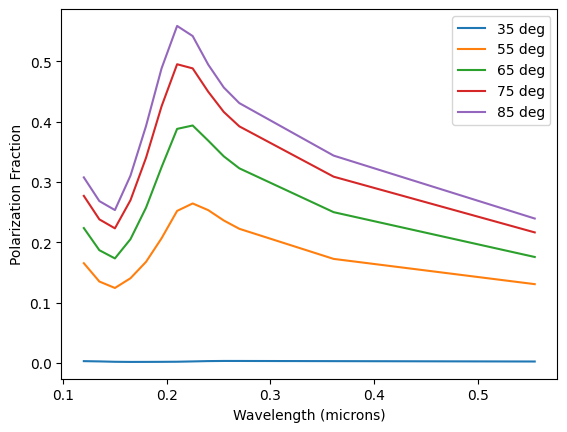

In [22]:
fig, ax = plt.subplots(1)

for ang in tab:
    ax.plot(tab[ang]["wavelegnth"], tab[ang]["P"], label="{} deg".format(ang))
ax.legend()

ax.set_ylabel('Polarization Fraction')
ax.set_xlabel('Wavelength (microns)')

plt.show()

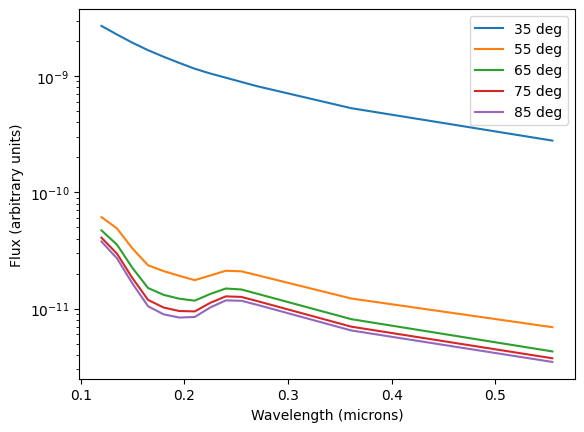

In [21]:
fig, ax = plt.subplots(1)

for ang in tab:
    ax.plot(tab[ang]["wavelegnth"], tab[ang]["flux"], label="{} deg".format(ang))
ax.legend()
ax.set_yscale('log')

ax.set_ylabel('Flux (arbitrary units)')
ax.set_xlabel('Wavelength (microns)')

plt.show()